<a href="https://colab.research.google.com/github/Chiragjain7254/CancerSense/blob/main/CancerSense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

print(breast_cancer_dataset)

# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)

# print the first 5 rows of the dataframe
data_frame.head()


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

# print last 5 rows of the dataframe
data_frame.tail()

# number of rows and columns in the dataset
data_frame.shape

# getting some information about the data
data_frame.info()

# checking for missing values
data_frame.isnull().sum()

# statistical measures about the data
data_frame.describe()

# checking the distribution of Target Variable
data_frame['label'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

1    357
0    212
Name: label, dtype: int64

In [5]:
data_frame.groupby('label').mean()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [6]:
# Separating the features and target
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

print(X)

print(Y)


     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [7]:
# Splitting the data into training data & Testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print(X.shape, X_train.shape, X_test.shape)


(569, 30) (455, 30) (114, 30)


In [8]:
# Splitting the data into training data & Testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print(X.shape, X_train.shape, X_test.shape)


(569, 30) (455, 30) (114, 30)


In [9]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)


In [26]:
# importing necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# set random seed for reproducibility
tf.random.set_seed(3)

# setting up the layers of the neural network
model = Sequential([
    # Input layer: Flatten layer to convert input shape (30,) to a 1D array
    Dense(128, input_shape=(30,), activation='relu'),

    # Hidden layers: Adding more dense layers with relu activation
    Dense(256, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting by randomly dropping 50% of neurons

    Dense(128, activation='relu'),
    BatchNormalization(),  # Batch normalization to stabilize and accelerate the training process

    Dense(64, activation='relu'),
    Dropout(0.4),  # Dropout layer to prevent overfitting by randomly dropping 40% of neurons

    Dense(32, activation='relu'),
    BatchNormalization(),

    Dense(16, activation='relu'),
    Dropout(0.3),  # Dropout layer to prevent overfitting by randomly dropping 30% of neurons

    # Output layer: Dense layer with softmax activation for multi-class classification
    Dense(2, activation='softmax')
])



# Early stopping to prevent overfitting and save training time
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Print model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               3968      
                                                                 
 dense_12 (Dense)            (None, 256)               33024     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_2 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                      

In [24]:
# Compile the model
model.compile(optimizer='adam',  # Using Adam optimizer for optimization
              loss='sparse_categorical_crossentropy',  # Sparse categorical crossentropy for multi-class classification
              metrics=['accuracy'])  # Monitoring accuracy during training

In [25]:
# Early stopping to prevent overfitting and save training time
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Print model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               3968      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                      

Epoch 1/10
13/13 [==============================] - 1s 17ms/step - loss: 0.3772 - accuracy: 0.8875 - val_loss: 0.2195 - val_accuracy: 0.9348
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2637 - accuracy: 0.9340 - val_loss: 0.1645 - val_accuracy: 0.9565
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2031 - accuracy: 0.9413 - val_loss: 0.1350 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1685 - accuracy: 0.9487 - val_loss: 0.1145 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1436 - accuracy: 0.9584 - val_loss: 0.1006 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1265 - accuracy: 0.9633 - val_loss: 0.0912 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1134 - accuracy: 0.9707 - val_loss: 0.0839 - val_accuracy: 0.9565
Epoch 8/10
13/13 [=

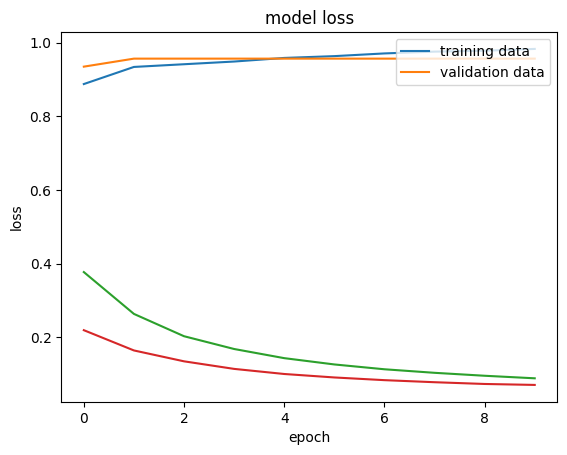

In [12]:
# training the Meural Network

history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

"""Visualizing accuracy and loss"""

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [13]:
"""Accuracy of the model on test data"""

loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

print(X_test_std.shape)
print(X_test_std[0])

Y_pred = model.predict(X_test_std)

print(Y_pred.shape)
print(Y_pred[0])

print(X_test_std)

print(Y_pred)

4/4 [==============================] - 0s 4ms/step - loss: 0.0997 - accuracy: 0.9737
0.9736841917037964
(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]
4/4 [==============================] - 0s 3ms/step
(114, 2)
[0.19357254 0.8213628 ]
[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0

In [14]:
"""model.predict() gives the prediction probability of each class for that data point"""

#  argmax function

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [15]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)


[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [16]:
"""**Building the predictive system**"""

input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

In [17]:
# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

1/1 [==============================] - 0s 20ms/step
[[0.06439434 0.928411  ]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
prediction_label = [np.argmax(prediction)]
print(prediction_label)

[1]


In [19]:
if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

The tumor is Benign


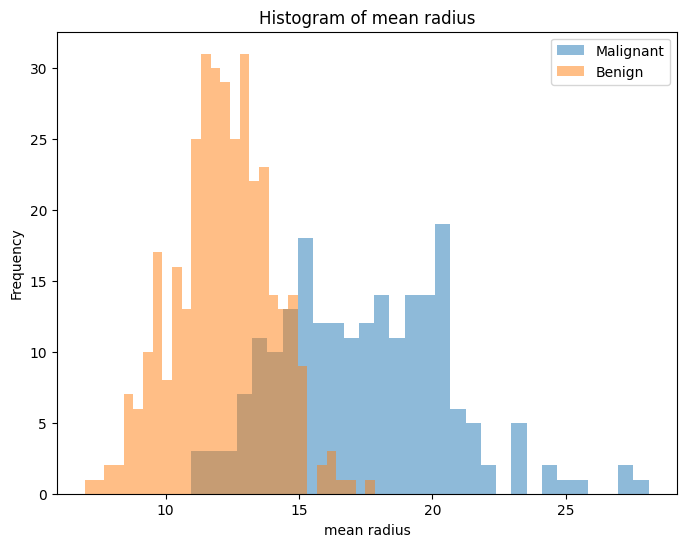

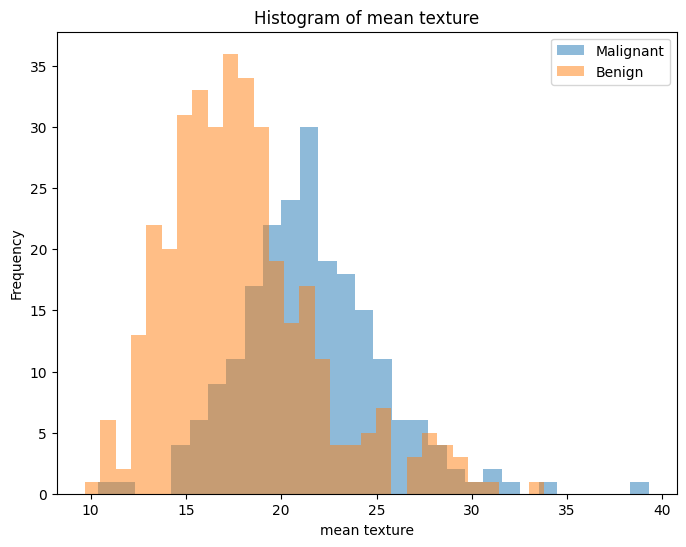

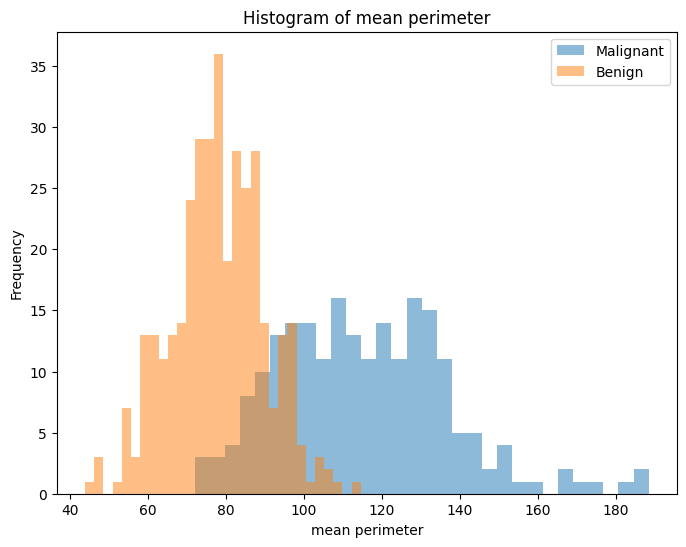

In [20]:
# Plot histograms for a few features
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter']

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    plt.hist(data_frame[data_frame['label'] == 0][feature], bins=30, alpha=0.5, label='Malignant')
    plt.hist(data_frame[data_frame['label'] == 1][feature], bins=30, alpha=0.5, label='Benign')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.legend()
    plt.show()
